Dataset Preview:
    Semi_Major_Axis  Eccentricity  Inclination        RAAN  \
0      7127.448143      0.003240    38.521899   18.605420   
1      7818.857168      0.063677     5.048398  191.287667   
2      7556.392730      0.031504     9.697723  194.628644   
3      7396.390181      0.050906    53.913251  229.474765   
4      6865.222369      0.090766    36.385744  261.392880   

   Argument_of_Perigee  True_Anomaly Orbit_Type  
0            37.124593    251.338217        LEO  
1           324.919046    192.994692        LEO  
2           181.890854    111.429942        LEO  
3           297.524688    292.966207        LEO  
4           115.217856    246.503222        LEO  

Accuracy: 0.8777777777777778

Classification Report:
               precision    recall  f1-score   support

         GEO       0.90      1.00      0.95        27
         LEO       0.83      0.97      0.89        35
         MEO       0.95      0.64      0.77        28

    accuracy                           0.8

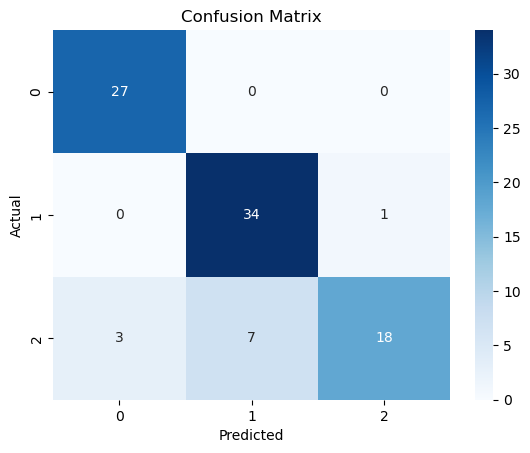

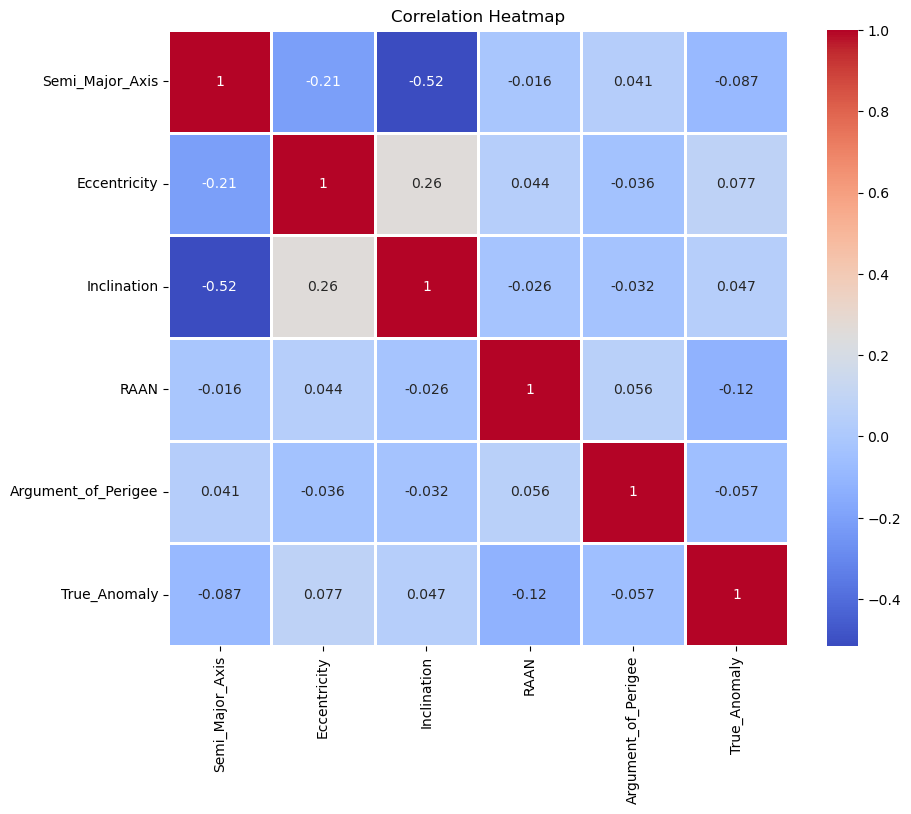

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the CSV dataset
file_path = r"C:\Users\esusa\Downloads\space_orbits.csv" 
data = pd.read_csv(file_path)

# Displaying the first few rows
print("Dataset Preview:\n", data.head())

# Preprocessing
X = data.drop('Orbit_Type', axis=1)  # Features
y = data['Orbit_Type']  # Labels

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Correlation Heatmap
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()
